In [1]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs_4eyes_ff"
min_generation = 20
max_generation = 40

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000020, 1 / 21 ...
reading generation_0000021, 2 / 21 ...
reading generation_0000022, 3 / 21 ...
reading generation_0000023, 4 / 21 ...
reading generation_0000024, 5 / 21 ...
reading generation_0000025, 6 / 21 ...
reading generation_0000026, 7 / 21 ...
reading generation_0000027, 8 / 21 ...
reading generation_0000028, 9 / 21 ...
reading generation_0000029, 10 / 21 ...
reading generation_0000030, 11 / 21 ...
reading generation_0000031, 12 / 21 ...
reading generation_0000032, 13 / 21 ...
reading generation_0000033, 14 / 21 ...
reading generation_0000034, 15 / 21 ...
reading generation_0000035, 16 / 21 ...
reading generation_0000036, 17 / 21 ...
reading generation_0000037, 18 / 21 ...
reading generation_0000038, 19 / 21 ...
reading generation_0000039, 20 / 21 ...
reading generation_0000040, 21 / 21 ...


In [4]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
9792,29,fish_241213_09_43_04.426408,17,False
9670,29,fish_241213_09_43_00.825283,17,False
4249,24,fish_241213_08_40_36.243726,20,True
11841,31,fish_241213_10_01_42.178353,20,False
12329,32,fish_241213_10_01_40.967407,20,True
...,...,...,...,...
7686,27,fish_241213_09_20_07.056405,10446,False
20094,40,fish_241213_11_02_44.541571,10500,True
8686,28,fish_241213_09_32_28.953086,11247,False
12188,32,fish_241213_10_01_30.550344,12056,True


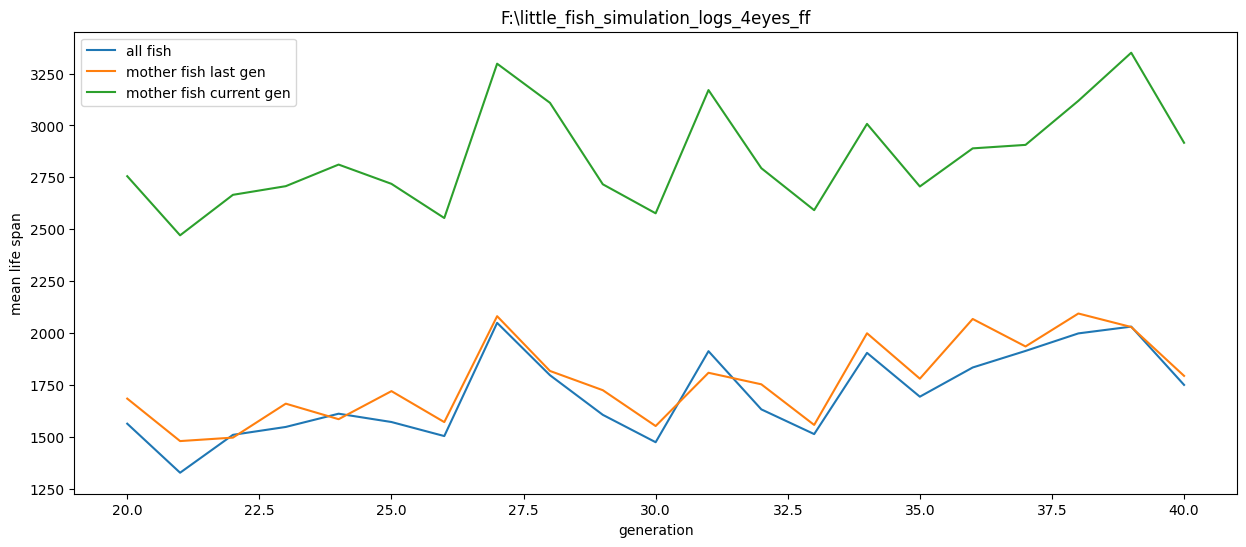

In [5]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

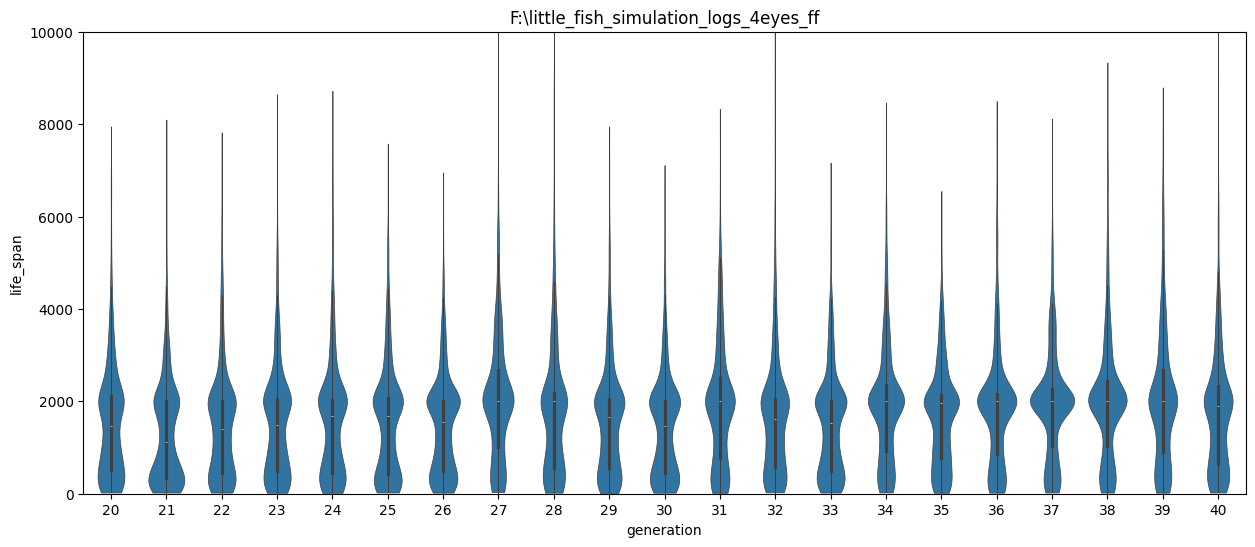

In [6]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

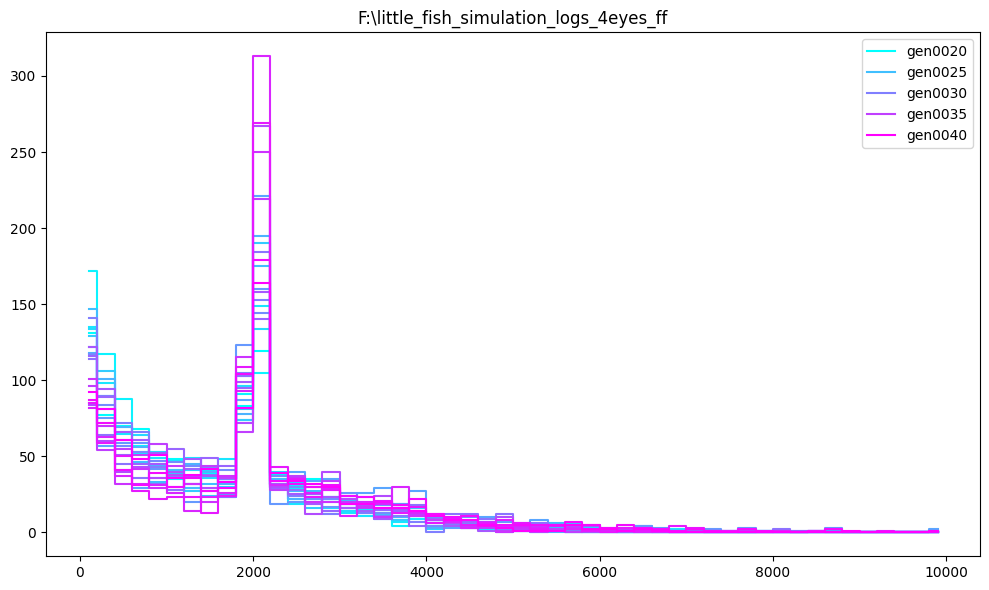

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()